## VACCINE CLASSIFICATION PROJECT

In [52]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report, auc, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve



## Business understanding

The business problem outlined in the context of the dataset is related to public health efforts in the context of the COVID-19 pandemic. Specifically, the challenge is to predict whether individuals received the H1N1 flu vaccine or the seasonal flu vaccine based on data collected in the National 2009 H1N1 Flu Survey.

The importance of this prediction task lies in understanding the factors and patterns associated with individuals' vaccination decisions. By identifying the demographic, opinion, and health behavior variables that correlate with vaccine uptake, public health authorities can gain insights that may inform future vaccination campaigns. This information can help guide strategies to improve vaccination rates, tailor communication efforts, and address specific concerns or barriers that certain groups may have regarding flu vaccination.

This insight can be valuable for public health officials and policymakers in developing targeted and effective strategies to increase vaccination coverage and mitigate the impact of flu outbreaks.

## TARGET EXPLORATION

In [6]:
df_t = pd.read_csv("../data/training_set_labels.csv")
df_t

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


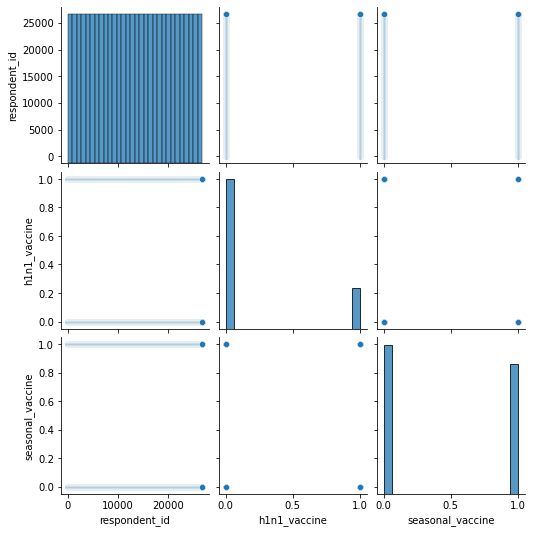

In [7]:
# target visualisation with pairplot
sns.pairplot(df_t)

In [8]:
df_t['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [9]:
df_t['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

## Features Exploration

In [10]:
#Reading the dataset 

df_f = pd.read_csv("../data/training_set_features.csv")
df_f

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [11]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
df_f.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [13]:
df_f.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [43]:
# Get a list of column names with dtype 'object'
object_columns = df_f.select_dtypes(include=['object']).columns.tolist()

df_f_obj = df_f[object_columns]
df_f_obj

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


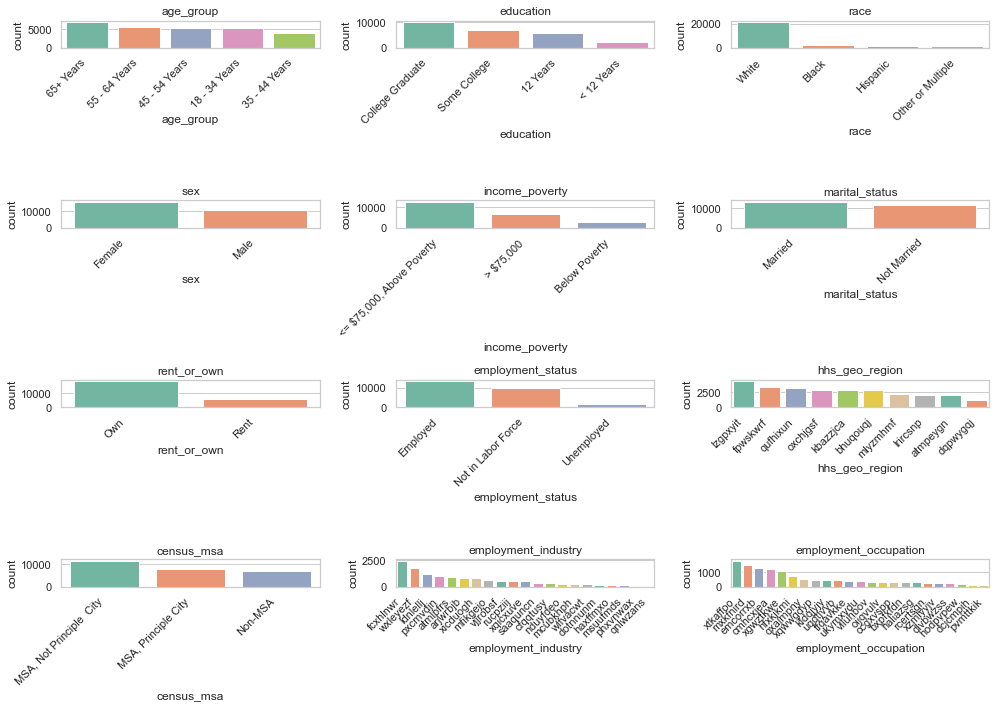

In [21]:


sns.set(style="whitegrid")

# Plotting using countplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(object_df.columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, data=object_df, palette="Set2", order=object_df[column].value_counts().index)
    plt.title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

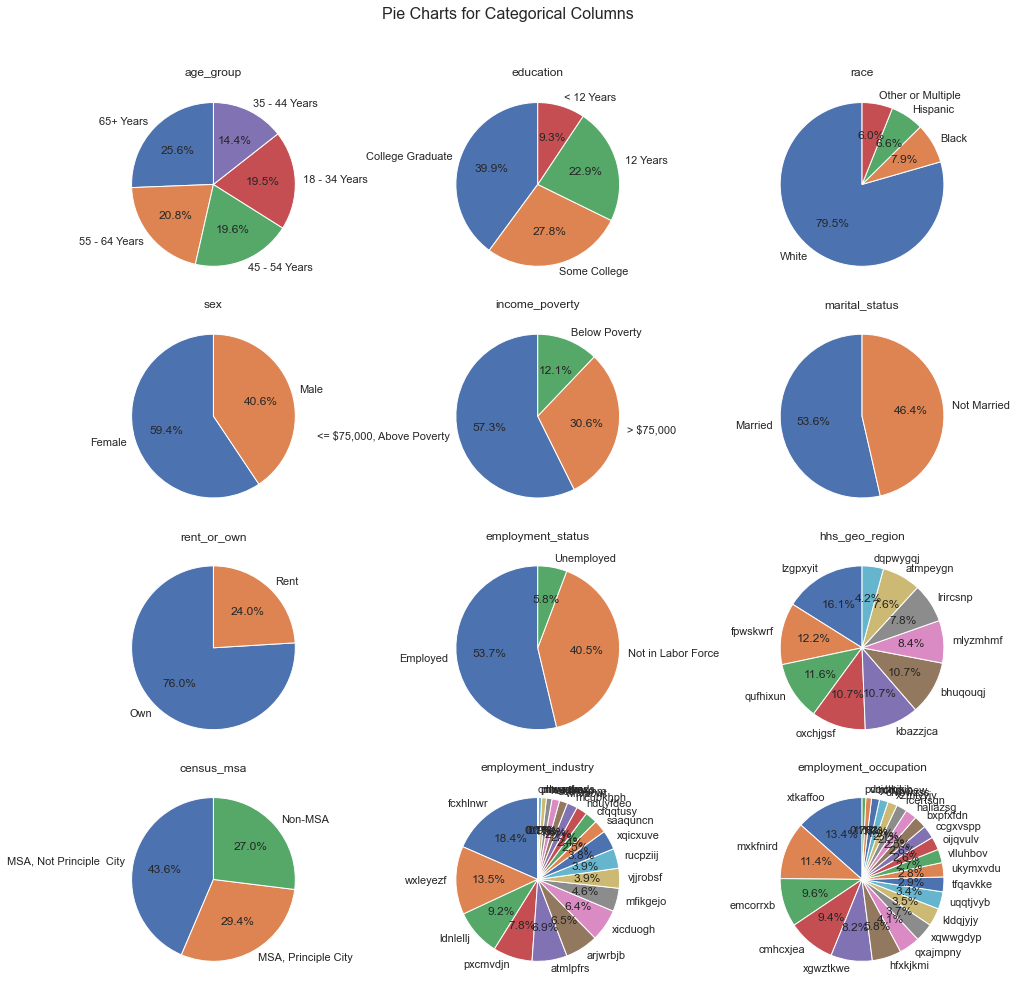

In [22]:
# Set up subplots for pie charts
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('Pie Charts for Categorical Columns', fontsize=16)

# Plotting using pie charts
for i, column in enumerate(object_df.columns):
    ax = axes[i // 3, i % 3]
    ax.pie(object_df[column].value_counts(), labels=object_df[column].value_counts().index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

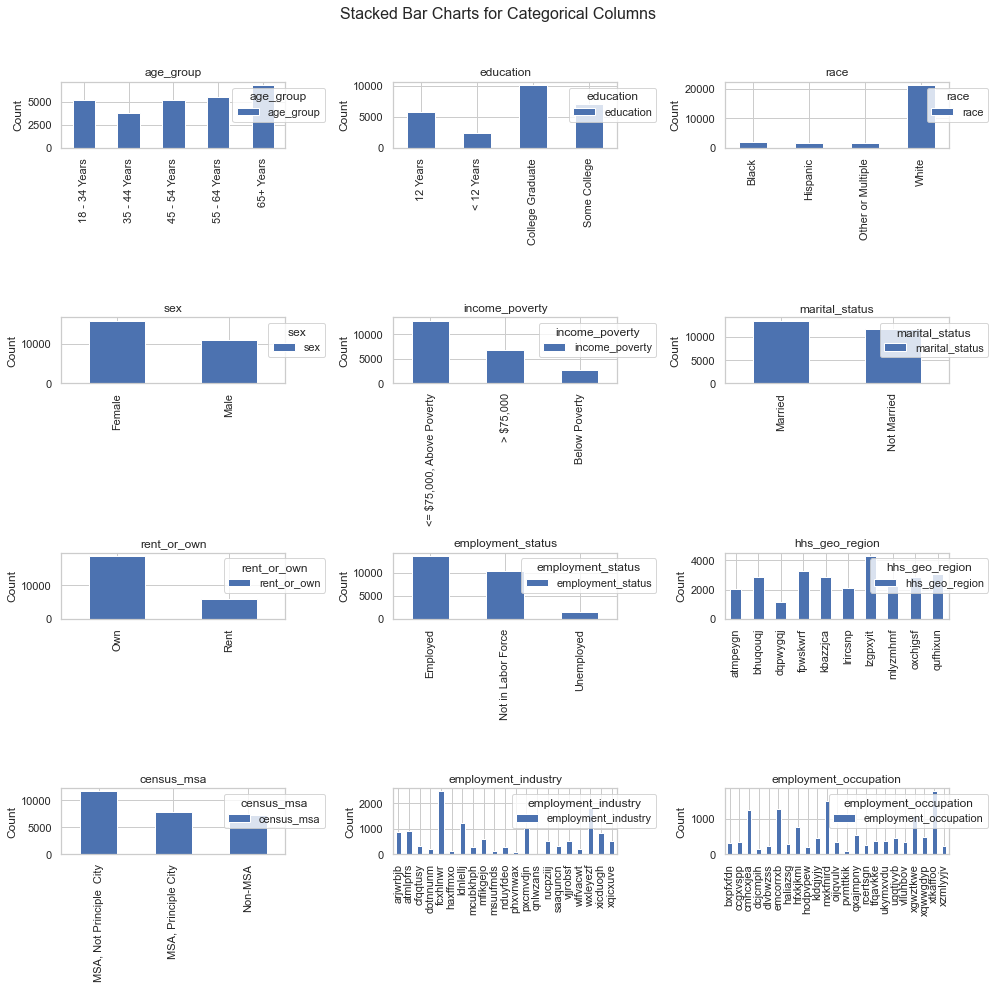

In [24]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
fig.suptitle('Stacked Bar Charts for Categorical Columns', fontsize=16)

# Plotting using stacked bar charts
for i, column in enumerate(object_df.columns):
    ax = axes[i // 3, i % 3]
    object_df[column].value_counts().sort_index().plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Count')
    ax.legend(title=column, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

In [32]:
# Get a list of column names with dtype 'category' and 'object'
df_f_num = df_f.select_dtypes(exclude=['object']).columns.tolist()

df_f_num = df_f[numerical_categorical_columns]
df_f_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

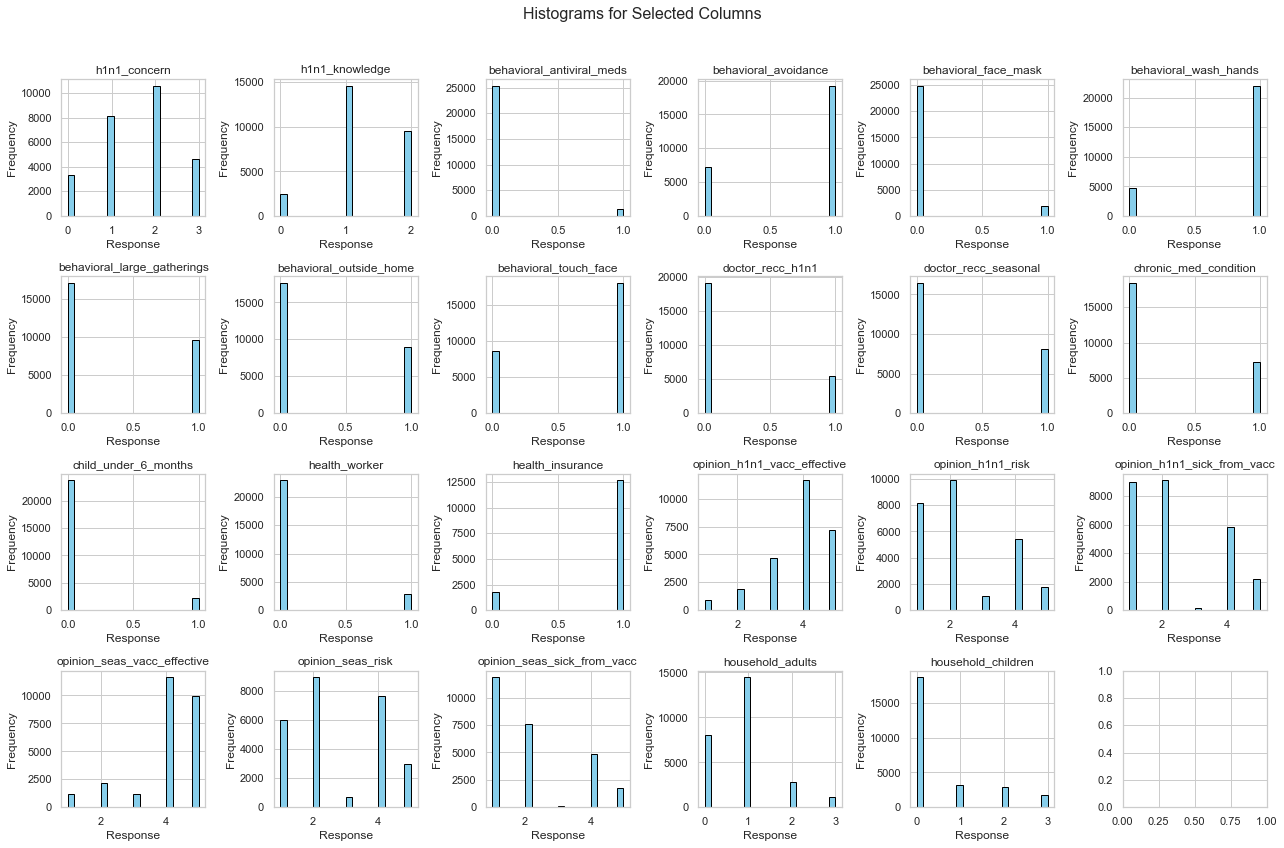

In [33]:
# Set up subplots for histograms
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
fig.suptitle('Histograms for Selected Columns', fontsize=16)

# Plotting histograms
for i, column in enumerate(df_f_num.columns[1:]):
    ax = axes[i // 6, i % 6]
    df_f_num[column].plot(kind='hist', ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Response')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [ ]:
#correlation visualisation for 


sns.set(rc={'figure.figsize':(20, 20)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(df_f.corr(), annot=True);

In [37]:
for column in df_f_num.drop(columns='respondent_id'):
    print(f"Column: {column}")
    print(df_f_num[column].value_counts())
    print()

Column: h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

Column: h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

Column: behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

Column: behavioral_avoidance
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

Column: behavioral_face_mask
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

Column: behavioral_wash_hands
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

Column: behavioral_large_gatherings
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

Column: behavioral_outside_home
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

Column: behavioral_touch_face
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

Column: doctor_recc_h1n1
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: 

In [38]:
df_full_n = df_f_num.merge(df_t, on='respondent_id', how='inner')

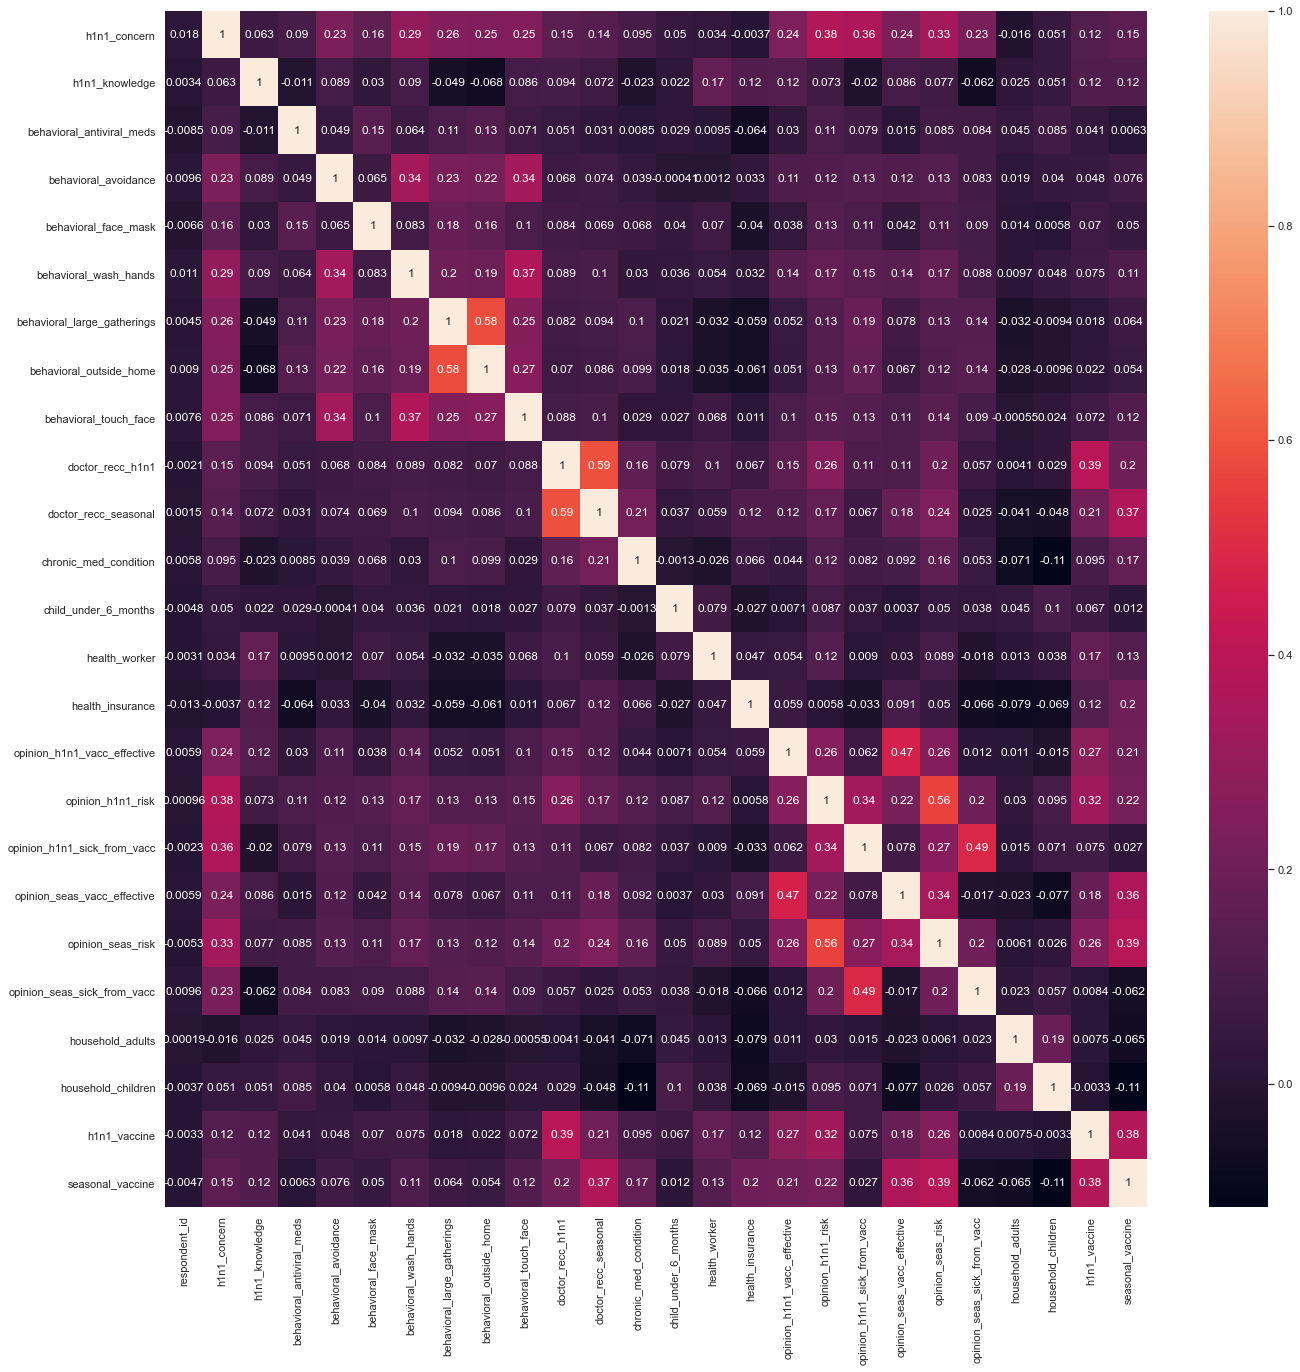

In [41]:
sns.set(rc={'figure.figsize':(22, 22)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(df_full_n.corr().drop('respondent_id'), annot=True);

In [45]:
df_f_obj


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [46]:
df_full_obj =pd.concat([df_f_obj, df_t], ignore_index=True)

In [49]:
df_full_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              26707 non-null  object 
 1   education              25300 non-null  object 
 2   race                   26707 non-null  object 
 3   sex                    26707 non-null  object 
 4   income_poverty         22284 non-null  object 
 5   marital_status         25299 non-null  object 
 6   rent_or_own            24665 non-null  object 
 7   employment_status      25244 non-null  object 
 8   hhs_geo_region         26707 non-null  object 
 9   census_msa             26707 non-null  object 
 10  employment_industry    13377 non-null  object 
 11  employment_occupation  13237 non-null  object 
 12  respondent_id          26707 non-null  float64
 13  h1n1_vaccine           26707 non-null  float64
 14  seasonal_vaccine       26707 non-null  float64
dtypes:

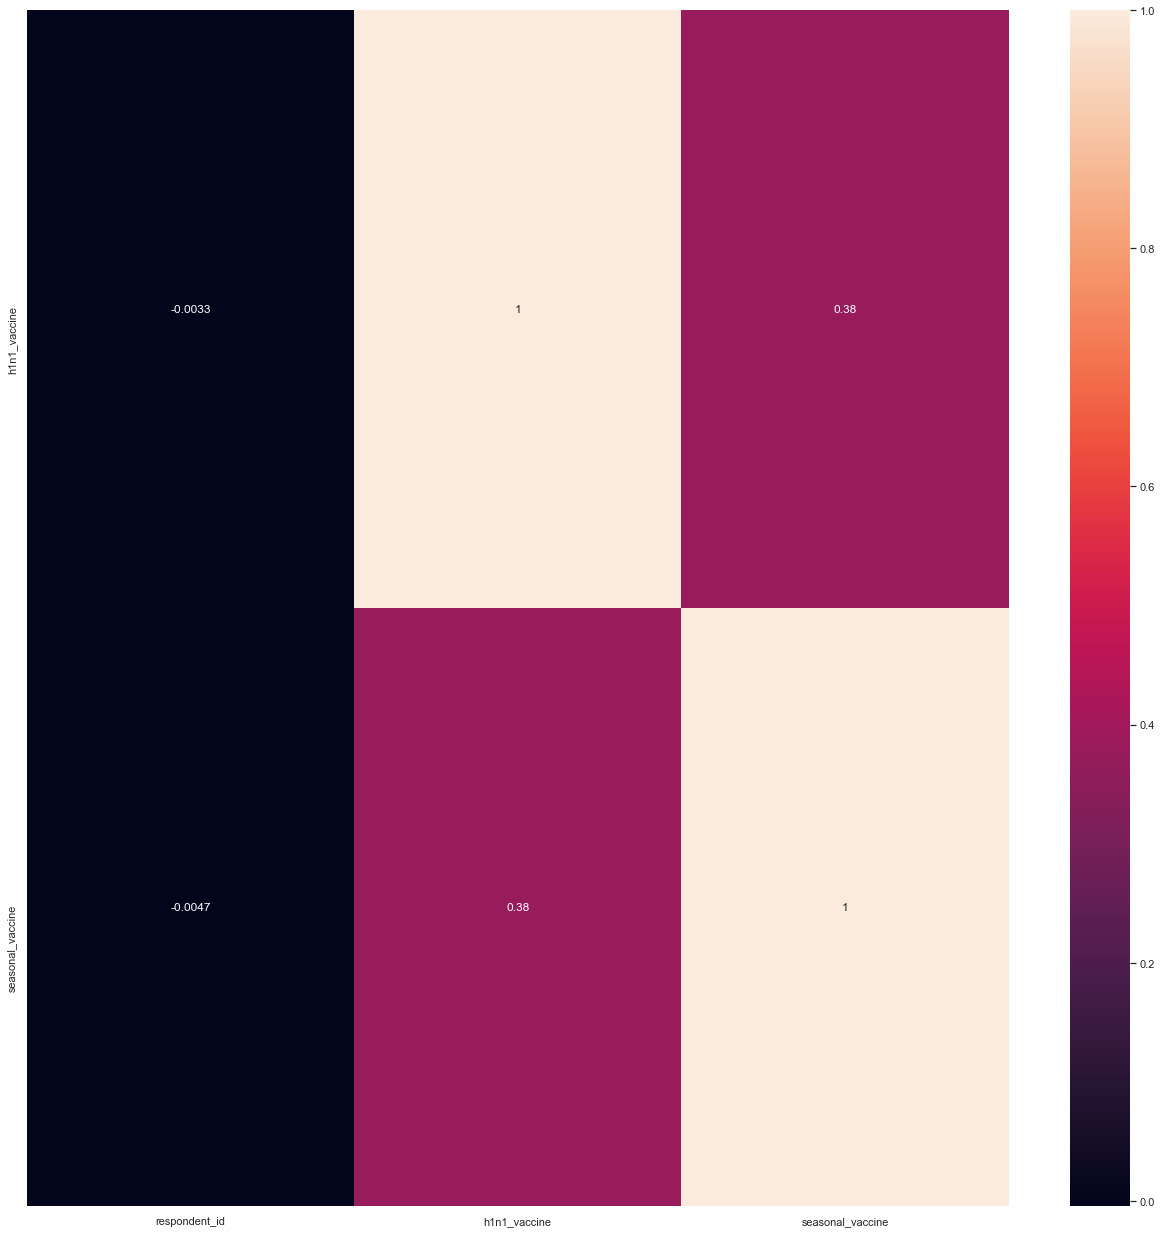

In [48]:
sns.set(rc={'figure.figsize':(22, 22)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(df_full_obj.corr().drop('respondent_id'), annot=True);

In [53]:
df_f_cat = df_full_obj.astype(str)

# Encode categorical columns
label_encoder = LabelEncoder()
df_encoded = df_f_cat.apply(label_encoder.fit_transform)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Categorical Columns')
plt.show()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [54]:
df_f_cat = df_f_cat.astype(str)

# Encode categorical columns
label_encoder = LabelEncoder()
df_encoded = df_f_cat.apply(label_encoder.fit_transform)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Categorical Columns')
plt.show()

NameError: name 'df_f_cat' is not defined